In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [2]:
df = pd.read_csv('../Preprocesssing/pre-processed.csv',header = 'infer') 

In [3]:
ClassLabel = df['ClassLabel']
tweets = df.tweets

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, ClassLabel, test_size=0.2, random_state=110123184)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=110123184)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [7]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(units=100))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
434/434 [==============================] - 6s 14ms/step - loss: 0.2985 - accuracy: 0.8270 - val_loss: 0.2297 - val_accuracy: 0.8663
Epoch 2/50
434/434 [==============================] - 6s 13ms/step - loss: 0.1815 - accuracy: 0.9044 - val_loss: 0.2163 - val_accuracy: 0.8801
Epoch 3/50
434/434 [==============================] - 6s 13ms/step - loss: 0.1421 - accuracy: 0.9267 - val_loss: 0.2276 - val_accuracy: 0.8662
Epoch 4/50
434/434 [==============================] - 6s 13ms/step - loss: 0.1090 - accuracy: 0.9441 - val_loss: 0.2564 - val_accuracy: 0.8700
Epoch 5/50
434/434 [==============================] - 6s 13ms/step - loss: 0.0798 - accuracy: 0.9590 - val_loss: 0.2648 - val_accuracy: 0.8657
Epoch 5: early stopping


In [6]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = y_test.T
print(classification_report(y_test, y_pred))

155/155 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.41      0.29      0.34       292
           1       0.91      0.94      0.92      3851
           2       0.78      0.77      0.77       814

    accuracy                           0.87      4957
   macro avg       0.70      0.66      0.68      4957
weighted avg       0.86      0.87      0.86      4957



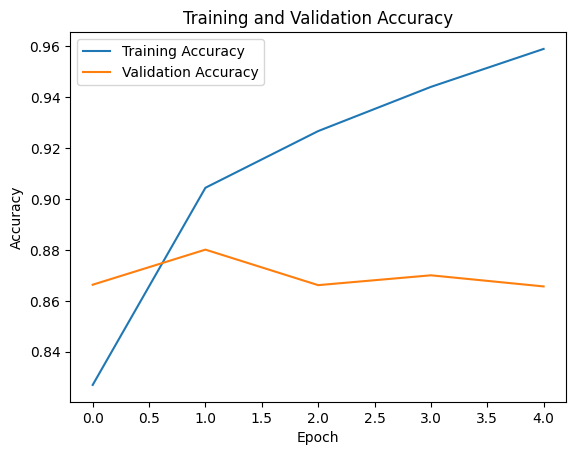

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()